In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [7]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [9]:
orig_inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913]])

In [11]:
orig_outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837])

In [13]:
# Add the new data points
new_data = np.array([0.821135, 0.631793, 0.21912 ])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(15, 16)

In [15]:
inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ]])

In [17]:
outputs = np.append(orig_outputs, -0.11475021790975153)

In [19]:
orig_outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837])

In [21]:
outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837,
       -0.11475022])

In [23]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,target
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


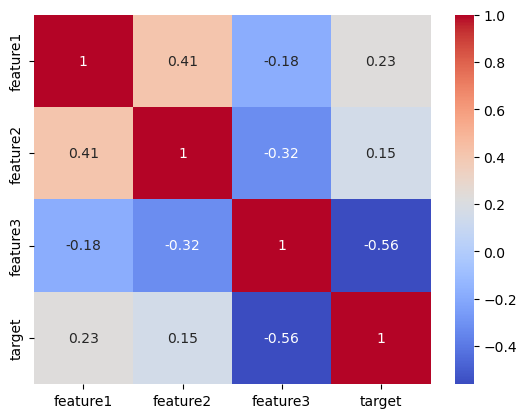

In [25]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  16 non-null     float64
 1   feature2  16 non-null     float64
 2   feature3  16 non-null     float64
 3   target    16 non-null     float64
dtypes: float64(4)
memory usage: 644.0 bytes


In [29]:
df.describe()

,feature1,feature2,feature3,target
count,16.000000,16.000000,16.000000,16.000000
mean,0.434787,0.524809,0.391308,-0.107641
std,0.284988,0.226852,0.278321,0.084235
min,0.046809,0.219917,0.066089,-0.398926
25%,0.171263,0.332394,0.224505,-0.114089
50%,0.419052,0.525792,0.270898,-0.108293
75%,0.650631,0.678247,0.485362,-0.054571
max,0.965995,0.941360,0.990882,-0.034835


In [31]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99])

,feature1,feature2,feature3,target
count,16.000000,16.000000,16.000000,16.000000
mean,0.434787,0.524809,0.391308,-0.107641
std,0.284988,0.226852,0.278321,0.084235
min,0.046809,0.219917,0.066089,-0.398926
10%,0.143229,0.257778,0.161279,-0.124754
25%,0.171263,0.332394,0.224505,-0.114089
50%,0.419052,0.525792,0.270898,-0.108293
75%,0.650631,0.678247,0.485362,-0.054571
90%,0.784023,0.793128,0.845194,-0.041663
95%,0.857350,0.881180,0.937549,-0.035992


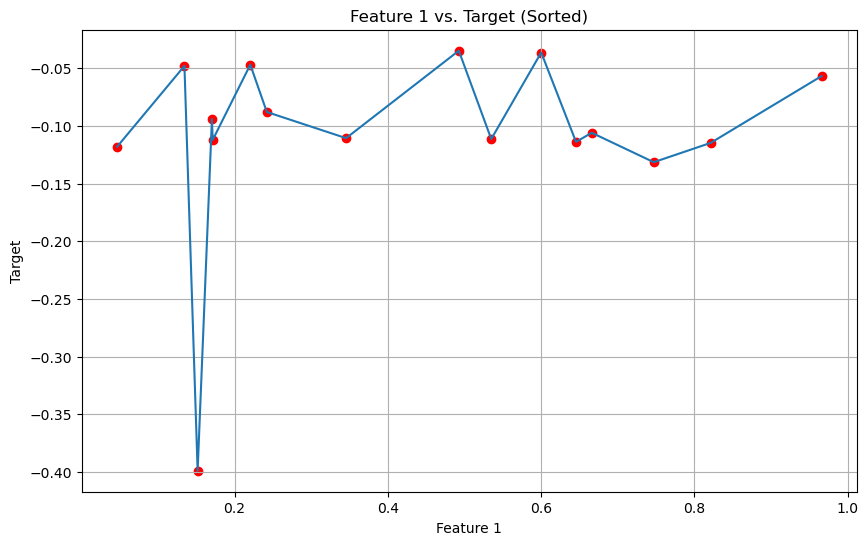

In [33]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

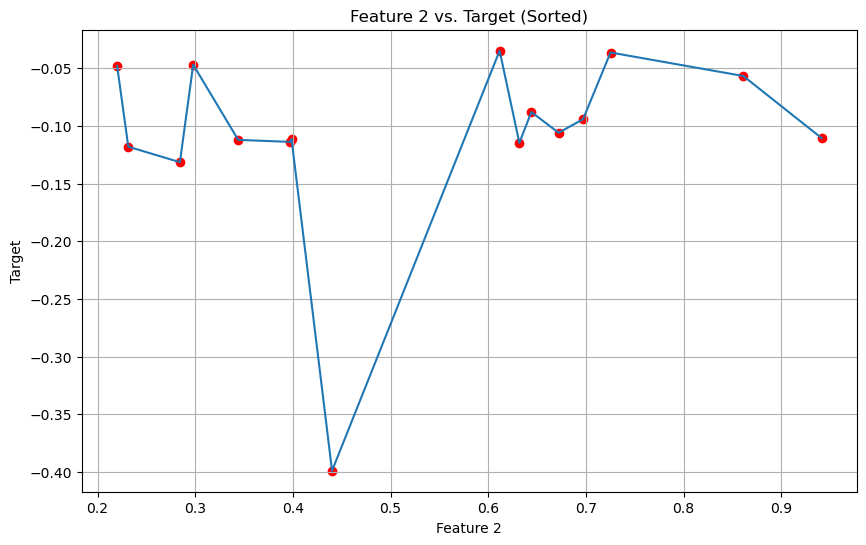

In [35]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

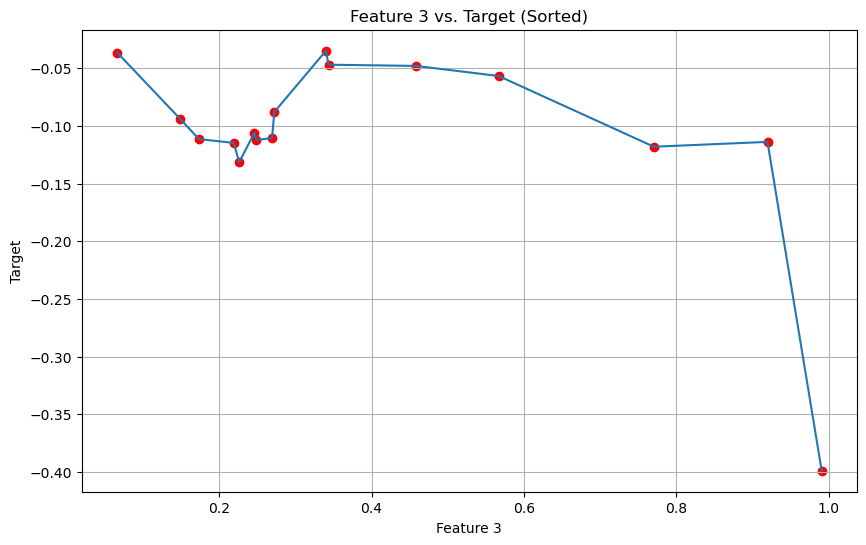

In [37]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


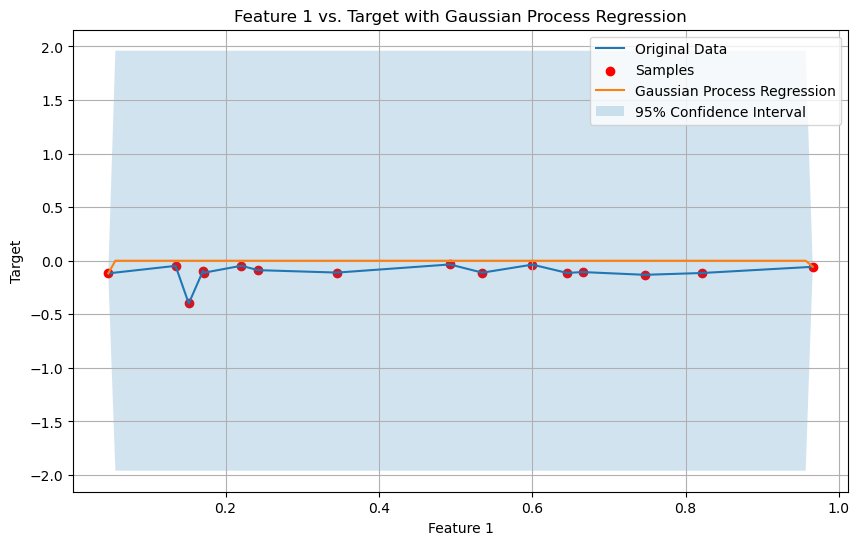

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define the kernel
kernel = RBF()  # You can adjust the kernel parameters if needed

# Create and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


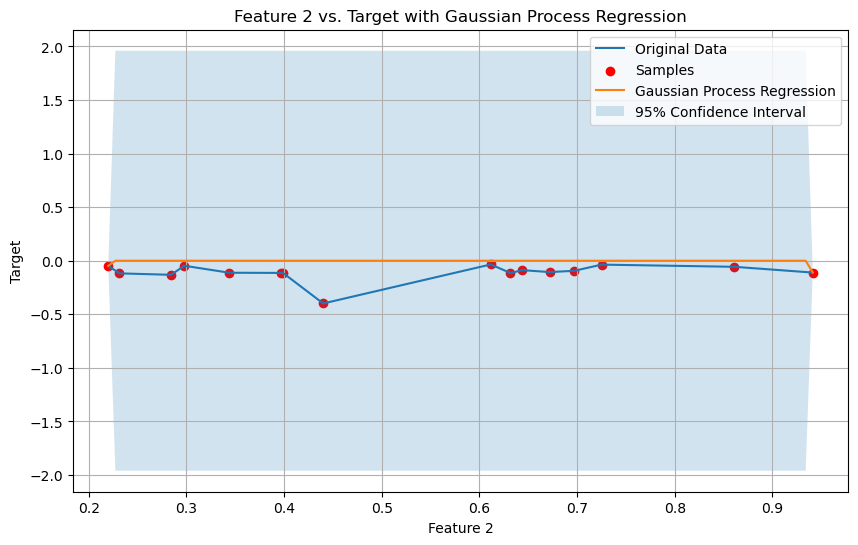

In [41]:
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel
kernel = RBF()  # You can adjust the kernel parameters if needed

# Create and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


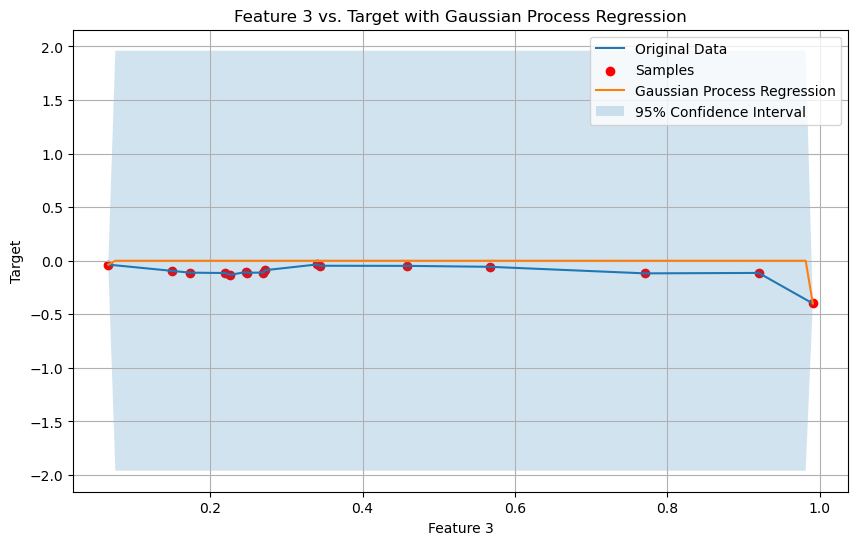

In [43]:
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel
kernel = RBF()  # You can adjust the kernel parameters if needed

# Create and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


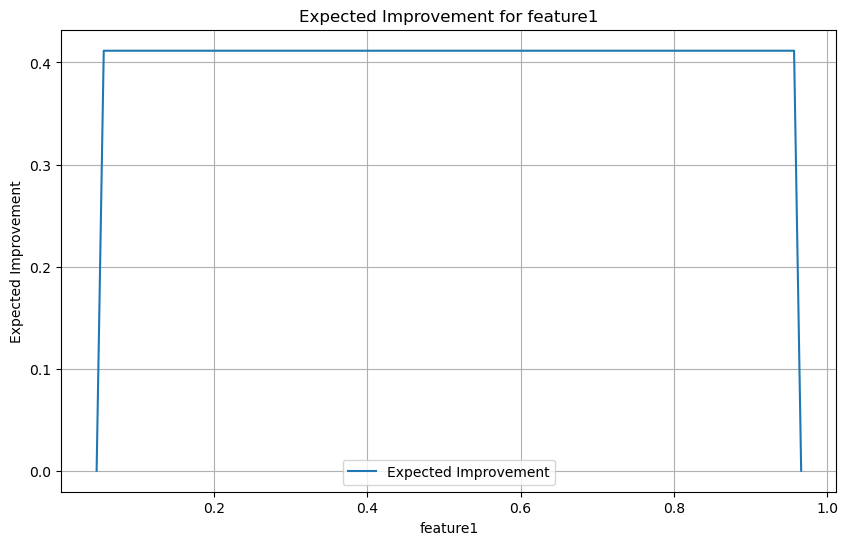

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


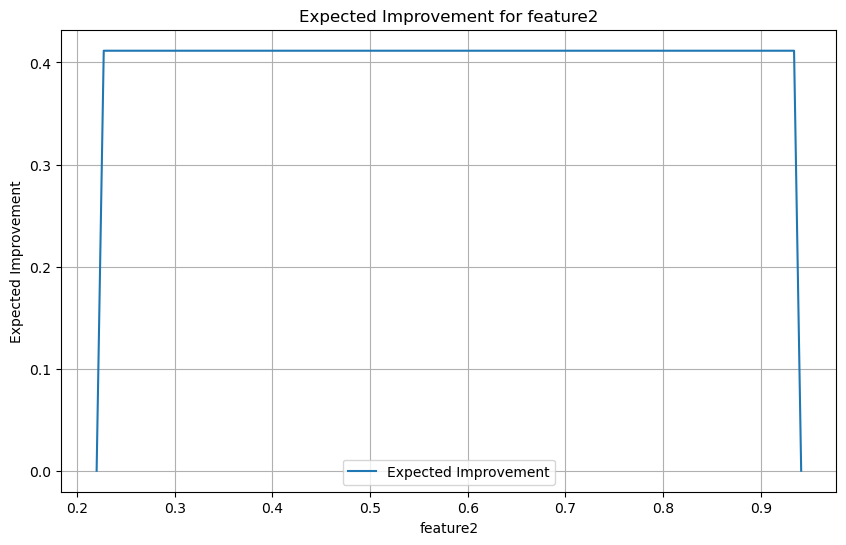

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


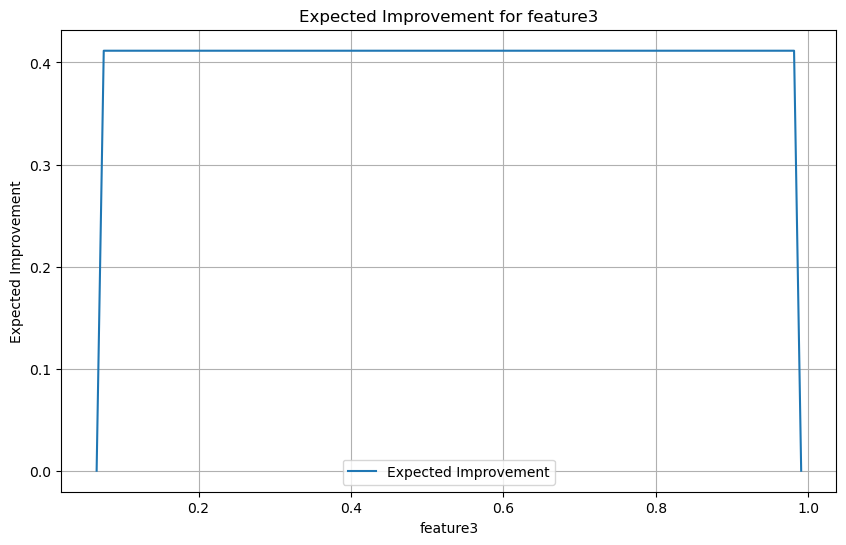

In [49]:
# Calculate and plot expected improvement for each feature

for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values
    
    # Create and fit the Gaussian Process Regressor
    kernel = RBF()
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Calculate expected improvement
    ei = expected_improvement(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ei, label='Expected Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


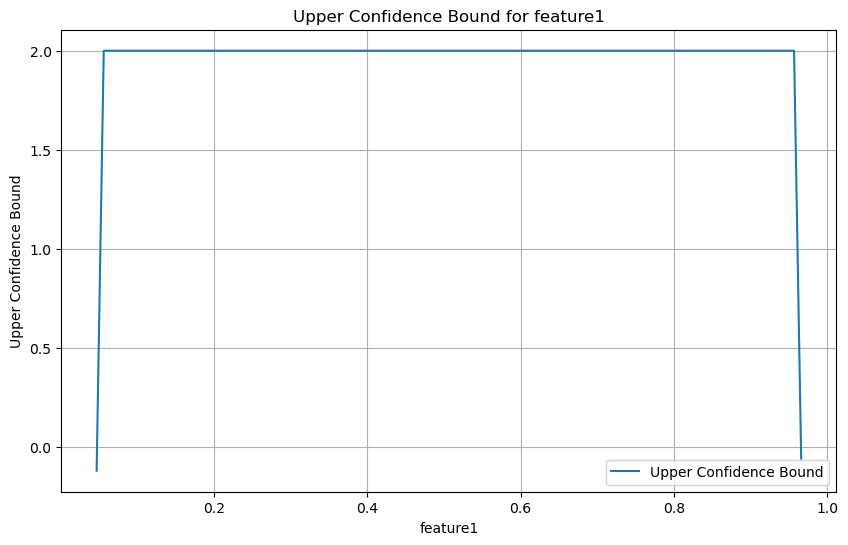

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


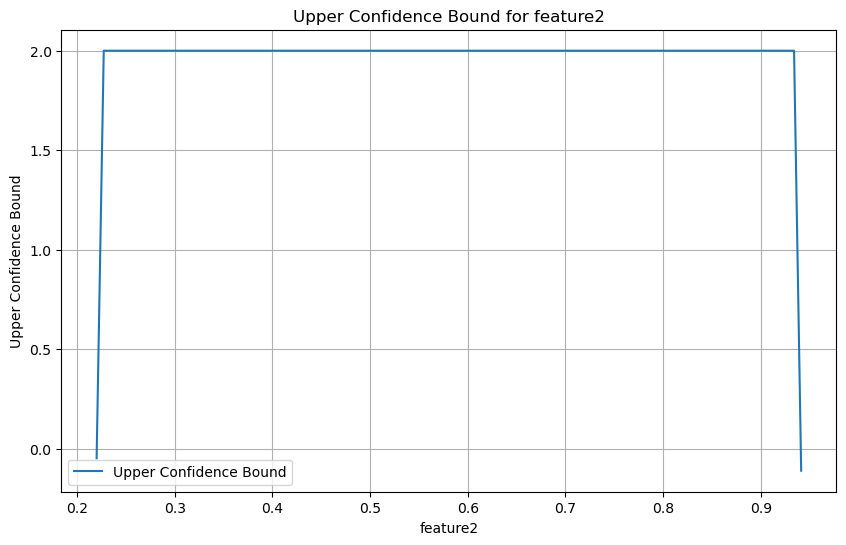

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


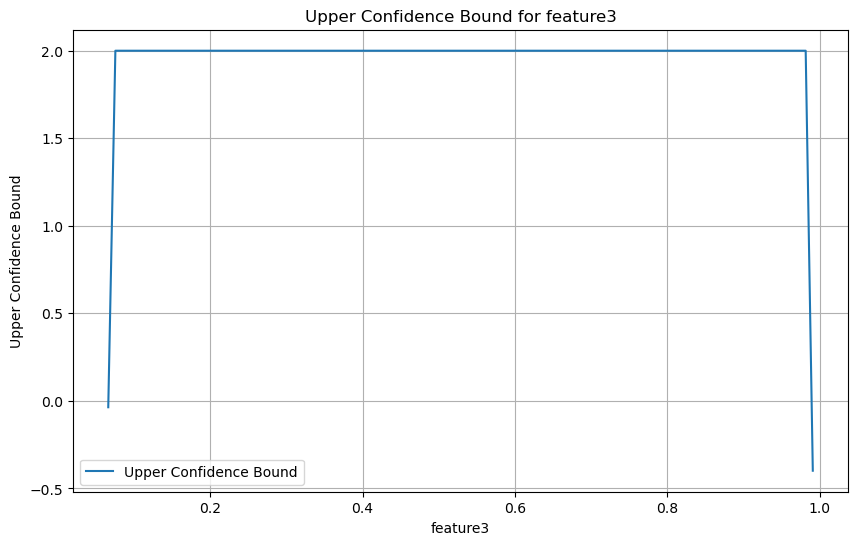

In [51]:
from scipy.stats import norm

# Assuming 'inputs', 'outputs', 'df' are defined as in your provided code.

def upper_confidence_bound(X, gpr, beta=2.0):
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return ucb

# Calculate and plot UCB for each feature
for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the GPR model
    kernel = RBF()
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    
    # Calculate UCB
    ucb = upper_confidence_bound(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ucb, label='Upper Confidence Bound')
    plt.xlabel(feature_name)
    plt.ylabel('Upper Confidence Bound')
    plt.title(f'Upper Confidence Bound for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


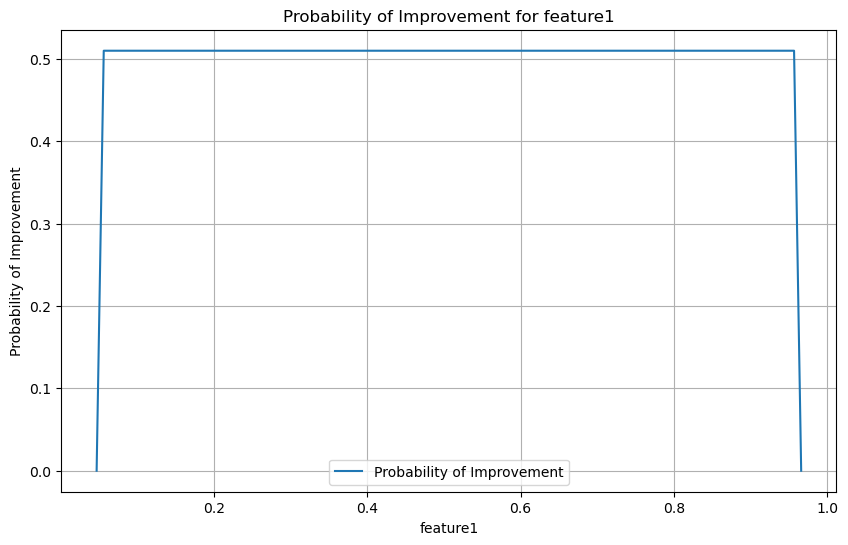

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


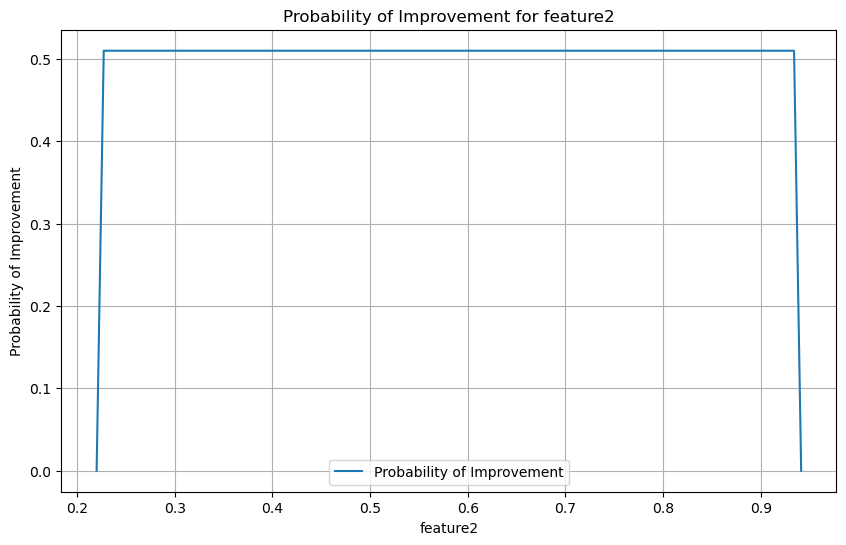

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


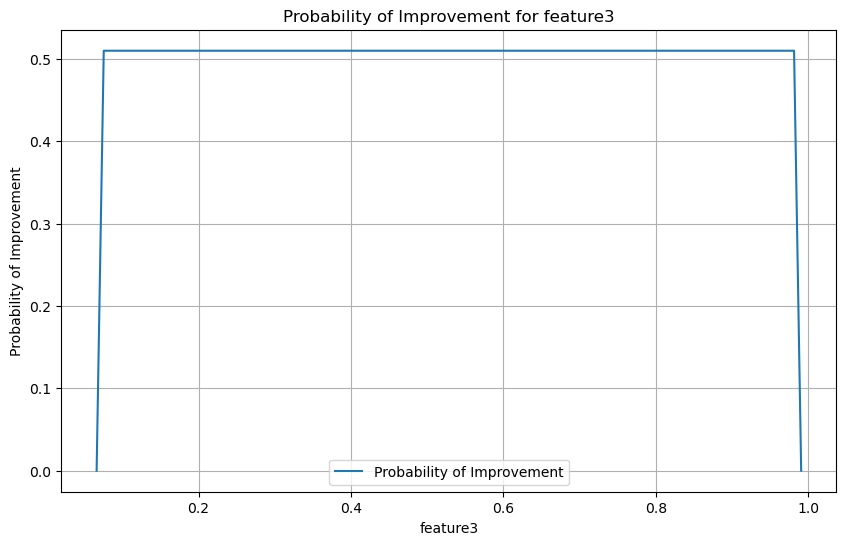

In [53]:
from scipy.stats import norm

def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        pi[sigma == 0.0] = 0.0
    return pi

# Calculate and plot Probability of Improvement for each feature
for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the GPR model
    kernel = RBF()
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    
    # Calculate PI
    pi = probability_of_improvement(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, pi, label='Probability of Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Improvement')
    plt.title(f'Probability of Improvement for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [55]:
from scipy.stats import norm

# Assuming 'inputs', 'outputs', 'df', 'gpr' are defined as in your previous code

# Define the acquisition function (e.g., Expected Improvement)
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei


# Generate new input data points based on the acquisition function


# 1. Create a grid of potential input values
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x3_grid = np.linspace(min(inputs[:, 2]), max(inputs[:, 2]), 100)
x1_grid, x2_grid, x3_grid = np.meshgrid(x1_grid, x2_grid, x3_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten(), x3_grid.flatten()])

# 2. Re-train the GPR model with both features
# Create and fit the GPR model with both features
kernel = RBF()  
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(inputs, outputs)  # Fit using 'inputs' which has both features

# 3. Evaluate the acquisition function at each grid point
ei_values = expected_improvement(grid_points, gpr)

# 4. Find the point with the highest acquisition function value
best_index = np.argmax(ei_values)
new_input_data = grid_points[best_index]

print("New Input Data:", new_input_data)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


New Input Data: [0.04680895 0.21991724 0.06608864]


In [59]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=3)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.04653369 0.22099488 0.04849143]


In [61]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.046534, 0.220995, 0.048491]


In [63]:
inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ]])

In [21]:
X = df.drop(["target"], axis=1)
y = df["target"]

print(X, y)

model = LogisticRegression()

y_binned = pd.qcut(y, q=2, labels=[0, 1])

#X, y = load_iris(return_X_y=True)
#scaler = StandardScaler()
#X_data = scaler.fit_transform(X)
#Xv_data = scaler.fit_transform(Xv)

#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)
model.fit(X, y_binned)

# Make predictions (on the same data for simplicity)
y_pred = model.predict(X)
#y_predP = model.predict_proba(X)

accuracy = accuracy_score(y_binned, y_pred)
precision = precision_score(y_binned, y_pred)
recall = recall_score(y_binned, y_pred)
f1_s = f1_score(y_binned, y_pred)
print(f1_score(y_binned, y_pred))
#f1 = f1_score(y_binned, y_pred)
cm = confusion_matrix(y_binned, y_pred)
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1_s:.2f}") 
print(cm)

    feature1  feature2  feature3
0   0.171525  0.343917  0.248737
1   0.242114  0.644074  0.272433
2   0.534906  0.398501  0.173389
3   0.492581  0.611593  0.340176
4   0.134622  0.219917  0.458206
5   0.345523  0.941360  0.269363
6   0.151837  0.439991  0.990882
7   0.645503  0.397143  0.919771
8   0.746912  0.284196  0.226300
9   0.170477  0.697032  0.149169
10  0.220549  0.297825  0.343555
11  0.666014  0.671985  0.246295
12  0.046809  0.231360  0.770618
13  0.600097  0.725136  0.066089
14  0.965995  0.861120  0.566829 0    -0.112122
1    -0.087963
2    -0.111415
3    -0.034835
4    -0.048008
5    -0.110621
6    -0.398926
7    -0.113869
8    -0.131461
9    -0.094190
10   -0.046947
11   -0.105965
12   -0.118048
13   -0.036378
14   -0.056758
Name: target, dtype: float64
0.4
Accuracy: 0.60
Precision: 0.67
Recall: 0.29
F1 Score: 0.40
[[7 1]
 [5 2]]


In [65]:
inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ]])

In [67]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.046534, 0.220995, 0.048491]
